In [1]:
# To import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_style("whitegrid")

# Write out what I'm investigating - looking at CC data with positively labeled fraud data.
# Consider my target = Class. Prediction is highly skewed.
# Baseline proximation for target
# Consider my data - There's some PCA transformations done. Data almost inherently undescribable. Supervised learning for uninterpretable dataset.
# Talk about data -
# define modeling options - heat map (class)


In [2]:
# import credit card data url from kaggle
# = 'https://www.kaggle.com/mlg-ulb/creditcardfraud/download'

In [3]:
# To read data
#auto = pd.read_csv('download')

In [4]:

#import sys

# If you're on Colab:
#if 'google.colab' in sys.modules:
    #DATA_PATH = 'https://www.kaggle.com/mlg-ulb/creditcardfraud/download'
    #!pip install category_encoders==2.*

In [5]:
df = pd.read_csv('creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
#df.dtypes

In [9]:
#df.isnull().sum()

In [10]:
# visualize the relationship between our data and our target
# our target is the class, it has been labeled so our problem is supervised
# we know that approximately .17 percent of the class is fraud
# we need to visualize how our data has been affected by PCA
# view how class may be affected by amount
# understand how time may affect fraud

### The dataset I'm using is highly skewed with only .1727% of the data for fraudulent activities. It is a credit card data with positively labeled fraud data.The main challenge I'm facing is how to use this highly imbalanced distribution between fraudulent and non-fraudulent classes in the dataset to predict fraudulent activities. Another challenge I'm facing is that most of the features of the dataset are numerical data transformed by PCA in order to keep customers records private. The dataset has only 3 known features which are time, amount and class. Class is distributed into fraud and non-fraud datasets, and is also the target. Time and amount are the features. The dataset was collected within a 2 days time period. There's some PCA transformations done. The data is almost inherently indescribable. It is a supervised learning for uninterpretable dataset. 

In [11]:
# df.info

In [12]:
# To get the stats of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
df['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

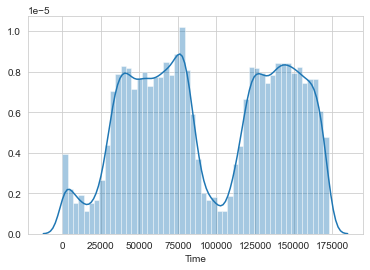

In [14]:
# To plot data
# class, time and amount distributions and clustering.
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Time']);

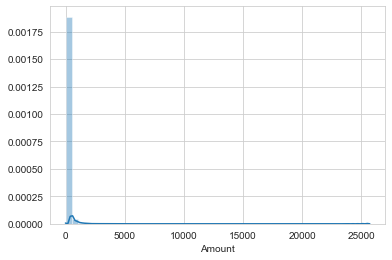

In [15]:
sns.distplot(df['Amount']);

/Users/edwinapalmer/.local/share/virtualenvs/Build-Week-2-o0u0PlhZ/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


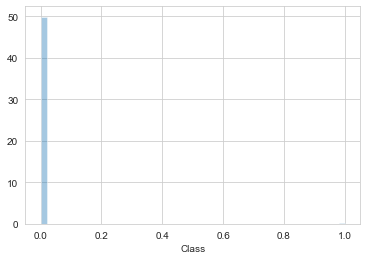

In [16]:
sns.distplot(df['Class']);

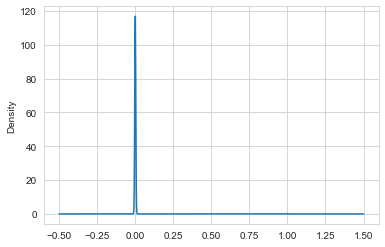

In [17]:
df['Class'].plot.density();

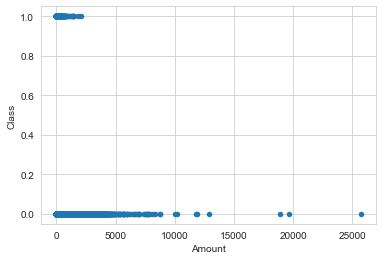

In [18]:
# view how class may be affected by amount
df.plot.scatter('Amount', 'Class');

### from the graphs above, we can see that most of the transactions are for small amounts and that is where fraudulent activities is more frequent.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

/Users/edwinapalmer/.local/share/virtualenvs/Build-Week-2-o0u0PlhZ/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


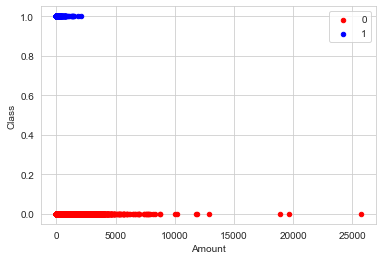

In [20]:
# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('Class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Amount', y='Class', label=key, color=colors[key])
plt.show()       

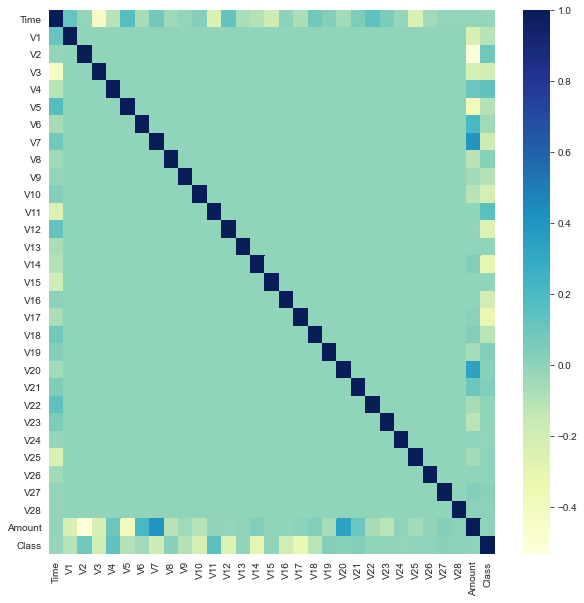

In [21]:
# Plot heatmap to see if there is any high correlation between the all the features in the dataset.
fig = plt.figure(figsize = (10, 10))
ax = sns.heatmap(data=df.corr(), cmap="YlGnBu")

There are few correlations between the features in the heatmap, most of the features do not correlate.

In [22]:
# To show how many classes, and the imbalance in classes. 

y = df['Class']
y.nunique()

2

In [23]:
# Baseline????
# Majority class occurs ~99% of the time
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

### This is a multi-class classification problem. The majority class occurs with 99% frequency.

In [24]:
df['Amount'].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

In [25]:
# to create fraud and non-fraud df

fraud = df[df['Class']==1]
non_fraud = df[df['Class']==0]

In [26]:
#fraud.sample(5)

In [27]:
#non_fraud.sample(5)

In [28]:
# Create dataframe of x, y and label values
# X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [29]:
# Drop labels to prove that this is truly unsupervised learning
# points = df.drop('label', axis=1)
# points.head()

In [30]:
# Scatter plot of our label-less data
# plt.scatter(points.x, points.y)
# plt.show()

In [31]:
# Calculate the centroid of the entire dataset (only for demonstration purposes)
# dataset_centroid_x = points.x.mean()
# dataset_centroid_y = points.y.mean()

# print(dataset_centroid_x, dataset_centroid_y)

In [32]:
# ax.plot(points.x, points.y)
# ax = plt.subplot(1,1,1)
# ax.scatter(points.x, points.y)
# ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
# plt.show()

In [33]:
# from sklearn.cluster import KMeans 
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# labels = kmeans.labels_

# print(labels)

In [34]:
# Add our new labels to the dataframe
# new_series = pd.Series(labels)
# df['Class'] = new_series.values

# df.head()

In [35]:
# def get_centroids(df, column_header):
#   x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
#   y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
#   data = {'x': x, 'y' : y}
#   return pd.DataFrame(data)

In [36]:
# We might get unlucky with different centroids and have slightly different clusters.
# centroids = get_centroids(df, 'Class')
# plot_clusters(df, 'Class', centroids)

In [37]:
# To get metrics from sklearn.metrics precision_recall_curve

#import numpy as np
#from sklearn.metrics import precision_recall_curve
#y_true = np.array([0, 0, 1, 1])
#y_scores = np.array([0.1, 0.4, 0.35, 0.8])
#precision, recall, thresholds = precision_recall_curve(
#         y_true, y_scores)

In [38]:
#precision

In [39]:
#recall

In [40]:
#thresholds

In [41]:
#from sklearn.metrics import average_precision_score
#average_precision = average_precision_score(y_test, y_score)

#print('Average precision-recall score: {0:0.2f}'.format(
 #     average_precision))

### find the colab that we used to model breast cancer and perform K-means. You should be able to cluster the components using that method. Also find PCA plots in the SC or Module form that week. 
## Applied Modeling and the Approach
### metrics will be from sklearn.metrics precision_recall_curve, sklearn.metrics import plot_precision_recall_curve, we can use randomforest, NN, randomserach cv to model
### model needs to predict better than .17 percent, given test data
## PLAN
### perform tt split, and score our model
### plot feature importance


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [44]:
# train/test split

target = 'Class'
features = df.columns.drop(target)

In [45]:
X = pd.DataFrame(df[features])
y = pd.DataFrame(df[target])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [47]:
X_train.shape, y_train.shape

((227845, 30), (227845, 1))

### Explain
##### metrics, model choice
##### feature importance for your metric

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import category_encoders as ce

In [50]:
# Average precision score metric
dtc = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=42),
)


dtc.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [51]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, dtc.predict(X_test))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.63


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [53]:
# Random forest classifier model

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

/Users/edwinapalmer/.local/share/virtualenvs/Build-Week-2-o0u0PlhZ/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Validation Accuracy 0.9997542221129876


### I used Aveage Precision Accuracy metric  and random forest model for because of the highly imbalanced class distribution of the dataset.

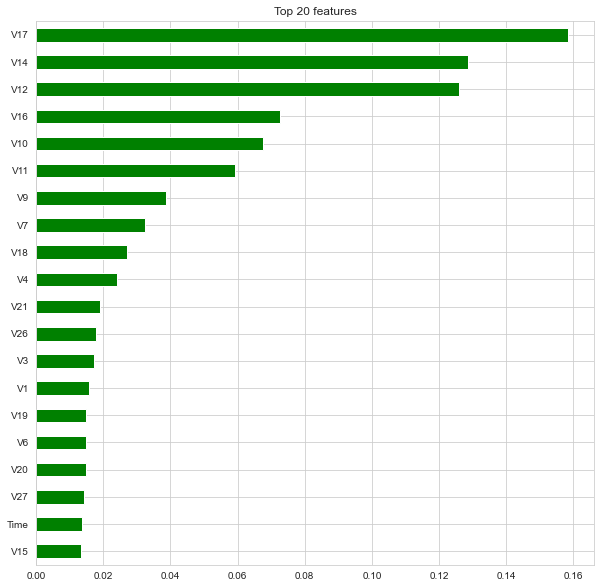

In [54]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='green');

### The feature importance above shows that time is the only known feature amongst the top 20 features, the rest of the top 20 features are the transformed features. 